In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#グラフがnotebook上に表示されるようにする
%matplotlib inline

In [3]:
#CSVを読み込む
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['点数'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

In [4]:
#無作為抽出（復元抽出）
np.random.choice([1, 2, 3], 3)

array([1, 1, 3])

In [5]:
#無作為抽出（非復元抽出）
np.random.choice([1, 2, 3], 3, replace=False)

array([2, 3, 1])

In [8]:
#無作為抽出（復元抽出）
#シードアリ
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [9]:
#400人から20人を無作為抽出（復元抽出）
#シードアリ
np.random.seed(0)
sample = np.random.choice(scores, 20)

70.4

In [11]:
#標本平均
sample.mean()

70.4

In [10]:
#母平均
scores.mean()

69.53

In [13]:
#400人から20人を無作為抽出（復元抽出）
#シードなし
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}回目の無作為抽出で得た標本平均', sample.mean())

1回目の無作為抽出で得た標本平均 72.45
2回目の無作為抽出で得た標本平均 63.7
3回目の無作為抽出で得た標本平均 66.05
4回目の無作為抽出で得た標本平均 71.7
5回目の無作為抽出で得た標本平均 74.15


In [14]:
#イカサマサイコロの確率
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]
np.random.choice(dice, p=prob)

1

In [15]:
#100回試行
num_trial = 100
sample = np.random.choice(dice, size=num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [22]:
#度数分布表
freq, _ = np.histogram(sample, bins=6, range=(1, 6))
pd.DataFrame({'度数':freq, '相対度数':freq / num_trial}, index=pd.Index(np.arange(1, 7), name='出目'))

,度数,相対度数
出目,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


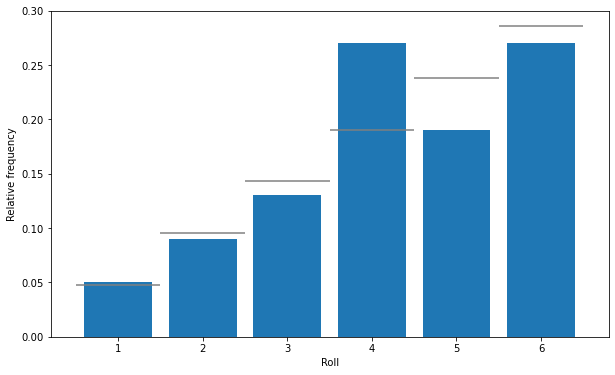

In [27]:
#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数6、最小値1、最大値7
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

#真の確率分布を横線で描画
ax.hlines(y=prob, xmin=np.arange(1, 7), xmax=np.arange(2, 8), colors='gray')

#棒グラフの中心に目盛りを付ける
#numpy.linspace(start, stop, element, endpoint=True)
ax.set_xticks(np.linspace(1.5, 6.5, 6))

#X軸に[1, 2, 3, 4, 5, 6]の目盛りを記載
ax.set_xticklabels(np.arange(1, 7))

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Roll')
ax.set_ylabel('Relative frequency')

#描画
plt.show()

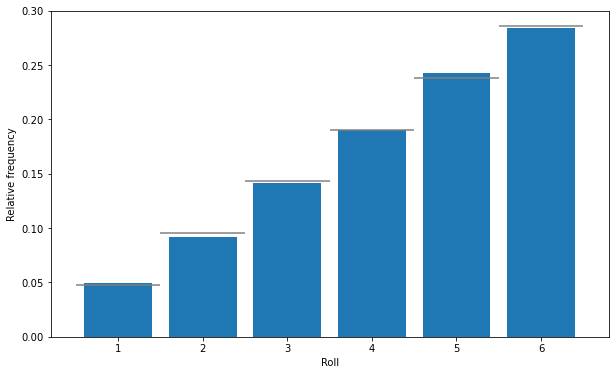

In [28]:
#10000回試行
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数6、最小値1、最大値7
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

#真の確率分布を横線で描画
ax.hlines(y=prob, xmin=np.arange(1, 7), xmax=np.arange(2, 8), colors='gray')

#棒グラフの中心に目盛りを付ける
#numpy.linspace(start, stop, element, endpoint=True)
ax.set_xticks(np.linspace(1.5, 6.5, 6))

#X軸に[1, 2, 3, 4, 5, 6]の目盛りを記載
ax.set_xticklabels(np.arange(1, 7))

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Roll')
ax.set_ylabel('Relative frequency')

#描画
plt.show()

In [30]:
#図4.3 試行回数を変化させたときの出目のヒストグラム
import matplotlib.animation as ani
from IPython.display import HTML

num_frame = 50
space = np.logspace(2, 5, num_frame).astype(int)
sample = np.random.choice(dice, size=100000, p=prob)

def animate(nframe):
    num_trial = space[nframe]
    ax.clear()
    ax.hist(sample[:num_trial], bins=6, range=(1, 7), density=True, rwidth=0.8)
    ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
    ax.set_title(f'Number of trials:{num_trial}')
    ax.set_xticks(np.linspace(1.5, 6.5, 6))
    ax.set_xticklabels(np.arange(1, 7))
    ax.set_ylim(0, 0.3)
    ax.set_xlabel('Roll', fontsize=12)
    ax.set_ylabel('Relative frequency', fontsize=12)
    
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim

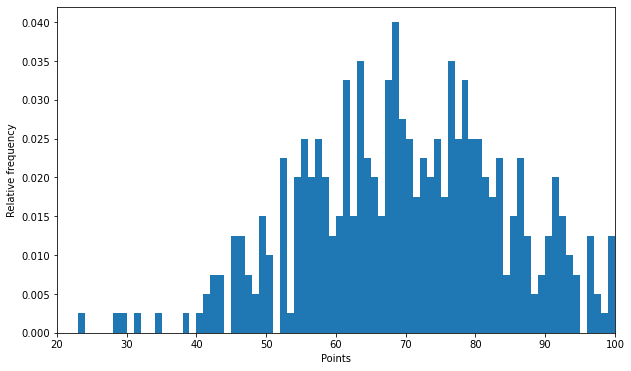

In [35]:
#母集団のヒストグラム 母集団の確率分布
#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数100、最小値0、最大値100
ax.hist(scores, bins=100, range=(0, 100), density=True)

#X軸、Y軸の上限値を付ける
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Points')
ax.set_ylabel('Relative frequency')

#描画
plt.show()

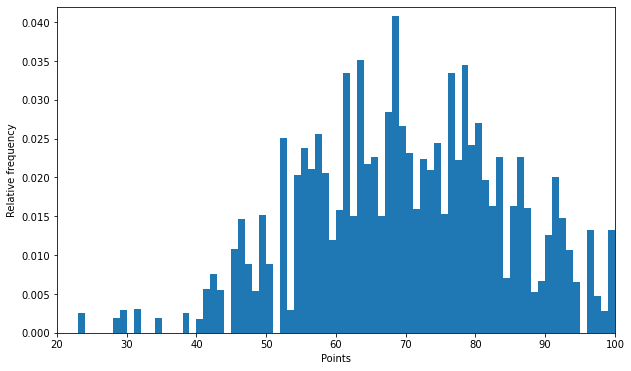

In [36]:
#無作為抽出を10000回実施（サンプル数10000）し、ヒストグラムにする
sample = np.random.choice(scores, 10000)

#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数100、最小値0、最大値100
ax.hist(sample, bins=100, range=(0, 100), density=True)

#X軸、Y軸の上限値を付ける
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Points')
ax.set_ylabel('Relative frequency')

#描画
plt.show()

In [38]:
#図4.5 無作為抽出で得た標本データのヒストグラム
np.random.seed(0)
sample = np.random.choice(scores, 10000)
num_frame = 50
space = np.logspace(1, 4, num_frame).astype(int)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
def animate(nframe):
    num_sample = space[nframe]
    ax.clear()
    ax.hist(sample[:num_sample], bins=100, range=(0, 100), density=True)
    ax.set_xlabel('Points', fontsize=12)
    ax.set_ylabel('Relative frequency', fontsize=12)
    ax.set_title(f'The Number of Samples:{num_sample}')
    ax.set_xlim(20, 100)
    
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim

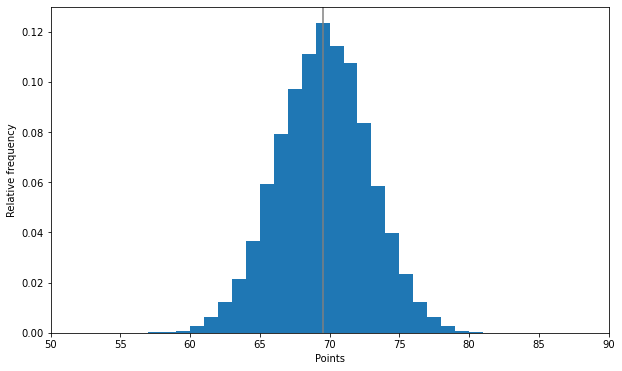

In [42]:
#標本平均を求める
#サンプルサイズ20,サンプル数10000
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

#キャンパス
fig = plt.figure(figsize=(10,  6))
ax = fig.add_subplot(111)

#階級数100、最小値0、最大値100
ax.hist(sample_means, bins=100, range=(0, 100), density=True)

#母平均を縦線で表示
ax.vlines(x=np.mean(scores), ymin=0, ymax=1, color='gray')

#X軸、Y軸の上限値を付ける
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)

#X軸,Y軸にラベルを付ける
ax.set_xlabel('Points')
ax.set_ylabel('Relative frequency')

#描画
plt.show()

In [43]:
#図4.6 標本平均の分布
np.random.seed(0)
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]

num_frame = 50
space = np.logspace(1, 4, num_frame).astype(int)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

def animate(nframe):
    num_trial = space[nframe]
    ax.clear()
    prob, _, _ = ax.hist(sample_means[:num_trial],
                         bins=100, range=(0, 100), density=True)
    ax.vlines(np.mean(scores), 0, 1, 'gray')
    ax.set_title(f'The Number of Samples:{num_trial}')
    ax.set_xlabel('Points', fontsize=12)
    ax.set_ylabel('Relative frequency', fontsize=12)
    ax.set_xlim(50, 90)
    ax.set_ylim(0, prob.max() * 1.1)
    
anim = ani.FuncAnimation(fig, animate, frames=num_frame)
js_anim = HTML(anim.to_jshtml())
plt.close()

js_anim